# Libraries and useful functions

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
def capfirst(string):
  ss = []
  for s in string.split('_'):
    ss.append(s[:1].upper() + s[1:])
  return ' '.join(ss)

# Load dataframe

In [3]:
# Mount drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/QuIP_CVRP/'

# Define the path to your CSV file on Google Drive
file_path = drive_path + 'test_results.csv'

Mounted at /content/drive


In [4]:
# Load data from a CSV file
df = pd.read_csv(file_path)

In [5]:
mask_1 = df['Quantum_Annealer'] != 'SimulAnneal'
mask_2 = df['Num_Nodes'] == 5
df = df[np.logical_and(mask_1, mask_2)]
df

,Quantum_Annealer,Quantum_Circuit_Model,Random_Seed,Num_Nodes,Num_Vehicles,Capacity,Customers_Demands,Graph_Sparsity,Average_Degree,Fully_Connected,...,QAOA_Classical_Optimizer_TSP_louvain,QAOA_Classical_Optimizer_TSP_Num_Iter_louvain,QAOA_Circuit_Depth_TSP_louvain,QAOA_Execution_Time_TSP_louvain,QuGAMA_Execution_Time_TSP_louvain,QuGAMA_Optimal_Objective_TSP_louvain,QuGAMA_Min_Num_Graver_Basis_TSP_louvain,QuGAMA_Max_Num_Graver_Basis_TSP_louvain,QuGAMA_Min_Num_Feasible_Sols_TSP_louvain,QuGAMA_Max_Num_Feasible_Sols_TSP_louvain
4,Advantage_system6.2,aer_simulator_statevector,2626,5,2,5,[0. 1. 1. 1. 1.],0.0,7.28,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Advantage_system6.2,aer_simulator_statevector,41580,5,2,5,[0. 1. 1. 1. 1.],0.0,8.32,True,...,COBYLA,300.0,1.0,2.250089,3.165158,54.0,1.0,1.0,2.0,2.0
9,Advantage_system6.2,aer_simulator_statevector,16188,5,2,5,[0. 1. 1. 1. 1.],0.0,8.24,True,...,COBYLA,300.0,1.0,2.890673,4.342178,65.0,1.0,1.0,2.0,2.0
10,Advantage_system6.2,aer_simulator_statevector,43092,5,2,3,[0. 1. 1. 1. 1.],0.0,7.92,True,...,COBYLA,300.0,1.0,17.034086,14.945445,47.0,1.0,1.0,1.0,2.0
11,Advantage_system6.2,aer_simulator_statevector,6944,5,2,3,[0. 1. 1. 1. 1.],0.0,8.96,True,...,COBYLA,300.0,1.0,21.036453,9.873336,59.0,1.0,9.0,1.0,12.0
12,Advantage_system6.2,aer_simulator_statevector,16716,5,2,5,[0. 1. 1. 1. 1.],0.0,9.36,True,...,COBYLA,300.0,1.0,13.381059,8.054927,58.0,1.0,9.0,1.0,12.0
13,Advantage_system6.2,aer_simulator_statevector,15744,5,1,5,[0. 1. 1. 1. 1.],0.0,6.32,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Advantage_system6.2,aer_simulator_statevector,32160,5,1,5,[0. 1. 1. 1. 1.],0.0,7.84,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Advantage_system6.2,aer_simulator_statevector,24038,5,1,5,[0. 1. 1. 1. 1.],0.0,7.12,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Advantage_system6.2,aer_simulator_statevector,120,5,1,5,[0. 1. 1. 1. 1.],0.0,9.20,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Drop columns containing NaN values
df = df.dropna(axis=1, how='all')

# print dataframe
df

,Quantum_Annealer,Quantum_Circuit_Model,Random_Seed,Num_Nodes,Num_Vehicles,Capacity,Customers_Demands,Graph_Sparsity,Average_Degree,Fully_Connected,...,QAOA_Classical_Optimizer_TSP_louvain,QAOA_Classical_Optimizer_TSP_Num_Iter_louvain,QAOA_Circuit_Depth_TSP_louvain,QAOA_Execution_Time_TSP_louvain,QuGAMA_Execution_Time_TSP_louvain,QuGAMA_Optimal_Objective_TSP_louvain,QuGAMA_Min_Num_Graver_Basis_TSP_louvain,QuGAMA_Max_Num_Graver_Basis_TSP_louvain,QuGAMA_Min_Num_Feasible_Sols_TSP_louvain,QuGAMA_Max_Num_Feasible_Sols_TSP_louvain
4,Advantage_system6.2,aer_simulator_statevector,2626,5,2,5,[0. 1. 1. 1. 1.],0.0,7.28,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Advantage_system6.2,aer_simulator_statevector,41580,5,2,5,[0. 1. 1. 1. 1.],0.0,8.32,True,...,COBYLA,300.0,1.0,2.250089,3.165158,54.0,1.0,1.0,2.0,2.0
9,Advantage_system6.2,aer_simulator_statevector,16188,5,2,5,[0. 1. 1. 1. 1.],0.0,8.24,True,...,COBYLA,300.0,1.0,2.890673,4.342178,65.0,1.0,1.0,2.0,2.0
10,Advantage_system6.2,aer_simulator_statevector,43092,5,2,3,[0. 1. 1. 1. 1.],0.0,7.92,True,...,COBYLA,300.0,1.0,17.034086,14.945445,47.0,1.0,1.0,1.0,2.0
11,Advantage_system6.2,aer_simulator_statevector,6944,5,2,3,[0. 1. 1. 1. 1.],0.0,8.96,True,...,COBYLA,300.0,1.0,21.036453,9.873336,59.0,1.0,9.0,1.0,12.0
12,Advantage_system6.2,aer_simulator_statevector,16716,5,2,5,[0. 1. 1. 1. 1.],0.0,9.36,True,...,COBYLA,300.0,1.0,13.381059,8.054927,58.0,1.0,9.0,1.0,12.0
13,Advantage_system6.2,aer_simulator_statevector,15744,5,1,5,[0. 1. 1. 1. 1.],0.0,6.32,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Advantage_system6.2,aer_simulator_statevector,32160,5,1,5,[0. 1. 1. 1. 1.],0.0,7.84,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Advantage_system6.2,aer_simulator_statevector,24038,5,1,5,[0. 1. 1. 1. 1.],0.0,7.12,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Advantage_system6.2,aer_simulator_statevector,120,5,1,5,[0. 1. 1. 1. 1.],0.0,9.20,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Let's take a look at the columns of our dataframe
for col in list(df.columns):
  print(col)

Quantum_Annealer
Quantum_Circuit_Model
Random_Seed
Num_Nodes
Num_Vehicles
Capacity
Customers_Demands
Graph_Sparsity
Average_Degree
Fully_Connected
Gurobi_Optimal_Solution_Full_Form
Gurobi_Optimal_Solution_Full_Form_is_valid_routing
Gurobi_Optimal_Objective_Full_Form
Gurobi_Execution_Time_Full_Form
Gurobi_Optimal_Solution_MKP
Gurobi_Optimal_Solution_MKP_is_valid_clustering
Gurobi_Optimal_Objective_MKP
Gurobi_Execution_Time_MKP
Num_Qubits_MKP
Num_Qubits_Embedding_MKP
Shortest_Chain_Length_MKP
Longest_Chain_Length_MKP
QA_Optimal_Solution_MKP
QA_Optimal_Solution_MKP_is_valid_clustering
QA_Optimal_Objective_MKP
QA_Execution_Time_MKP
QA_QPU_Access_Time_MKP
VQE_Optimal_Solution_MKP
VQE_Optimal_Solution_MKP_is_valid_clustering
VQE_Optimal_Objective_MKP
VQE_Classical_Optimizer_MKP
VQE_Classical_Optimizer_MKP_Num_Iter
VQE_Circuit_Depth_MKP
VQE_Execution_Time_MKP
QAOA_Optimal_Solution_MKP
QAOA_Optimal_Solution_MKP_is_valid_clustering
QAOA_Optimal_Objective_MKP
QAOA_Classical_Optimizer_MKP
QAOA_Cl

In [8]:
# fix data gathering error (change sign of MM objective function value column)
for algo in ['QA', 'VQE', 'QAOA', 'QuGAMA']:
  df[algo+'_Optimal_Objective_MM'] = -df[algo+'_Optimal_Objective_MM']

<ipython-input-8-4bce262a4bdd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[algo+'_Optimal_Objective_MM'] = -df[algo+'_Optimal_Objective_MM']


In [9]:
# drop outliers

# last fields are all NaN. Probably because I consumed all DWave credits before running the instance to completion
df = df.drop(df[df['Random_Seed']==2626].index)

# sus data point. The 2PE on this instance provides a better solution than Gurobi Full Form. This shouldn't be possible??
df = df.drop(df[df['Random_Seed']==41580].index)

In [10]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

       Random_Seed  Num_Nodes  Num_Vehicles   Capacity  Graph_Sparsity  \
count     25.00000       25.0     25.000000  25.000000            25.0   
mean   17836.20000        5.0      1.800000   3.920000             0.0   
std    13252.16887        0.0      0.408248   1.187434             0.0   
min      120.00000        5.0      1.000000   2.000000             0.0   
25%     8256.00000        5.0      2.000000   3.000000             0.0   
50%    16188.00000        5.0      2.000000   5.000000             0.0   
75%    24038.00000        5.0      2.000000   5.000000             0.0   
max    43092.00000        5.0      2.000000   5.000000             0.0   

       Average_Degree  Gurobi_Optimal_Objective_Full_Form  \
count       25.000000                           25.000000   
mean         8.051200                           48.960000   
std          1.015055                           10.787647   
min          5.520000                           28.000000   
25%          7.440000       

# TSP (5, 1)

## Load dataframe

In [11]:
# Take TSP instances only
mask_TSP = df['Num_Vehicles']==1
df_TSP = df[mask_TSP]

# Drop columns containing NaN values
df_TSP = df_TSP.dropna(axis=1, how='all')

# Print dataframe
df_TSP

,Quantum_Annealer,Quantum_Circuit_Model,Random_Seed,Num_Nodes,Num_Vehicles,Capacity,Customers_Demands,Graph_Sparsity,Average_Degree,Fully_Connected,...,VQE_Classical_Optimizer_TSP_MKP,VQE_Classical_Optimizer_TSP_Num_Iter_MKP,VQE_Circuit_Depth_TSP_MKP,VQE_Execution_Time_TSP_MKP,QuGAMA_Execution_Time_TSP_MKP,QuGAMA_Optimal_Objective_TSP_MKP,QuGAMA_Min_Num_Graver_Basis_TSP_MKP,QuGAMA_Max_Num_Graver_Basis_TSP_MKP,QuGAMA_Min_Num_Feasible_Sols_TSP_MKP,QuGAMA_Max_Num_Feasible_Sols_TSP_MKP
13,Advantage_system6.2,aer_simulator_statevector,15744,5,1,5,[0. 1. 1. 1. 1.],0.0,6.32,True,...,COBYLA,100.0,1.0,42.243737,5.969622,49.0,1,1,1,1
14,Advantage_system6.2,aer_simulator_statevector,32160,5,1,5,[0. 1. 1. 1. 1.],0.0,7.84,True,...,COBYLA,100.0,1.0,40.631519,6.210297,46.0,1,1,5,5
15,Advantage_system6.2,aer_simulator_statevector,24038,5,1,5,[0. 1. 1. 1. 1.],0.0,7.12,True,...,COBYLA,100.0,1.0,39.193909,7.254808,35.0,1,1,11,11
16,Advantage_system6.2,aer_simulator_statevector,120,5,1,5,[0. 1. 1. 1. 1.],0.0,9.20,True,...,COBYLA,100.0,1.0,40.379536,6.504886,50.0,1,1,12,12
17,Advantage_system6.2,aer_simulator_statevector,23940,5,1,5,[0. 1. 1. 1. 1.],0.0,7.44,True,...,COBYLA,100.0,1.0,40.906665,7.506678,42.0,1,1,3,3


In [12]:
# Let's take a look at the columns of our dataframe
for col in list(df_TSP.columns):
  print(col)

Quantum_Annealer
Quantum_Circuit_Model
Random_Seed
Num_Nodes
Num_Vehicles
Capacity
Customers_Demands
Graph_Sparsity
Average_Degree
Fully_Connected
Gurobi_Optimal_Solution_Full_Form
Gurobi_Optimal_Solution_Full_Form_is_valid_routing
Gurobi_Optimal_Objective_Full_Form
Gurobi_Execution_Time_Full_Form
Gurobi_Execution_Time_TSP_MKP
Gurobi_Optimal_Objective_TSP_MKP
Max_Num_Qubits_TSP_MKP
Max_Num_Qubits_Embedding_TSP_MKP
Shortest_Chain_Length_TSP_MKP
Longest_Chain_Length_TSP_MKP
QA_Execution_Time_TSP_MKP
QA_QPU_Access_Time_TSP_MKP
QA_Optimal_Objective_TSP_MKP
VQE_Optimal_Objective_TSP_MKP
VQE_Classical_Optimizer_TSP_MKP
VQE_Classical_Optimizer_TSP_Num_Iter_MKP
VQE_Circuit_Depth_TSP_MKP
VQE_Execution_Time_TSP_MKP
QuGAMA_Execution_Time_TSP_MKP
QuGAMA_Optimal_Objective_TSP_MKP
QuGAMA_Min_Num_Graver_Basis_TSP_MKP
QuGAMA_Max_Num_Graver_Basis_TSP_MKP
QuGAMA_Min_Num_Feasible_Sols_TSP_MKP
QuGAMA_Max_Num_Feasible_Sols_TSP_MKP


## Plots for comparisons

In [13]:
def plot_boxplots_TSP():

  model_str = '_' + 'TSP_MKP'

  # Model objective value analysis
  cols_obj = ['Gurobi_Optimal_Objective'+model_str, 'QA_Optimal_Objective'+model_str,
              'QuGAMA_Optimal_Objective'+model_str, 'VQE_Optimal_Objective'+model_str]
  df_TSP_obj = df_TSP[cols_obj]
  # drop nan values
  df_TSP_obj = df_TSP_obj.dropna()
  # we want to examine the difference wrt the optimal objective as found by Gurobi
  df_TSP_obj = (df_TSP_obj.sub(df_TSP_obj['Gurobi_Optimal_Objective'+model_str], axis=0)).div(df_TSP_obj['Gurobi_Optimal_Objective'+model_str], axis=0)
  # drop gurobi column
  df_TSP_obj.drop('Gurobi_Optimal_Objective'+model_str, axis=1, inplace=True)

  # Reshape the DataFrame
  df_TSP_obj = df_TSP_obj.melt(var_name='algorithm', value_name='objective')
  # first column to contain the name of the algorithm
  df_TSP_obj['algorithm'] = df_TSP_obj['algorithm'].apply(lambda x: x.split('_')[0])

  ##########################################################

  # Model Execution time analysis
  cols_time = ['Gurobi_Execution_Time'+model_str, 'QA_Execution_Time'+model_str,
               'QuGAMA_Execution_Time'+model_str, 'VQE_Execution_Time'+model_str]
  df_TSP_time = df_TSP[cols_time]
  # drop nan values
  df_TSP_time = df_TSP_time.dropna()
  # we want to examine the difference wrt Gurobi execution time
  df_TSP_time = df_TSP_time.div(df_TSP_time['Gurobi_Execution_Time'+model_str], axis=0)
  # drop gurobi column
  df_TSP_time.drop('Gurobi_Execution_Time'+model_str, axis=1, inplace=True)

  # Reshape the DataFrame
  df_TSP_time = df_TSP_time.melt(var_name='algorithm', value_name='execution_time')
  # first column to contain the name of the algorithm
  df_TSP_time['algorithm'] = df_TSP_time['algorithm'].apply(lambda x: x.split('_')[0])

  ##########################################################

  # Plot boxplots

  # Create a subplot with two columns
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))

  my_pal = {"QA": "r", "QuGAMA": "m", "VQE":"y"}

  # Box plot of objective function values by algorithm
  sns.boxplot(x='algorithm', y='objective', data=df_TSP_obj, ax=axs[0], palette=my_pal, medianprops=dict(color="k", alpha=1))
  axs[0].set_xlabel('Algorithm')
  axs[0].set_ylabel('Objective Value')
  axs[0].set_title('Objective Value Distribution for TSP wrt Gurobi')
  axs[0].set_facecolor('lightgray')

  # Box plot of execution time values by algorithm
  sns.boxplot(x='algorithm', y='execution_time', data=df_TSP_time, ax=axs[1], palette=my_pal, medianprops=dict(color="k", alpha=1))
  axs[1].set_xlabel('Algorithm')
  axs[1].set_ylabel('Execution time')
  axs[1].set_title('Execution time Distribution for TSP wrt Gurobi')
  axs[1].set_facecolor('lightgray')

  plt.show()
  return

In [14]:
# number of graver elements extracted (both kernel and feasibles) for each approach
def plot_optimal_objective_TSP(df):

  mask = df['Quantum_Annealer'] != 'SimulAnneal'
  df = df[mask]

  colors = ['r', 'm', 'y']  # Assign colors to each algorithm
  marker_size = 50  # Set the marker size

  max_obj = -np.inf
  min_obj = np.inf

  fig, ax = plt.subplots(figsize = (5, 5))
  for i, algo in enumerate(['QA', 'QuGAMA', 'VQE']):
    ax.scatter(df['Gurobi_Optimal_Objective_TSP_MKP'], df[algo + '_Optimal_Objective_TSP_MKP'], label=algo, c=colors[i], s=marker_size, edgecolor='k')

    # take min obj to better plot identity function
    new_min_obj = np.min(df[algo + '_Optimal_Objective_TSP_MKP'])
    if new_min_obj < min_obj:
      min_obj = new_min_obj

    # take max obj to better plot identity function
    new_max_obj = np.max(df[algo + '_Optimal_Objective_TSP_MKP'])
    if new_max_obj > max_obj:
      max_obj = new_max_obj

  # plot also identity function for comparison
  ax.plot([min_obj-5, max_obj+5], [min_obj-5, max_obj+5], color='k', linewidth=1.0)

  # Set the background color to light gray
  ax.set_facecolor('lightgray')
  # Add grid lines
  ax.grid(True)
  # Set labels and title
  ax.set_xlabel('Gurobi Optimal Objective')
  ax.set_ylabel('Quantum Algo Optimal Objective')
  ax.set_title('TSP Optimal Objective wrt Gurobi')

  # Add a legend
  ax.legend()

  # Show the plot
  plt.show()
  return

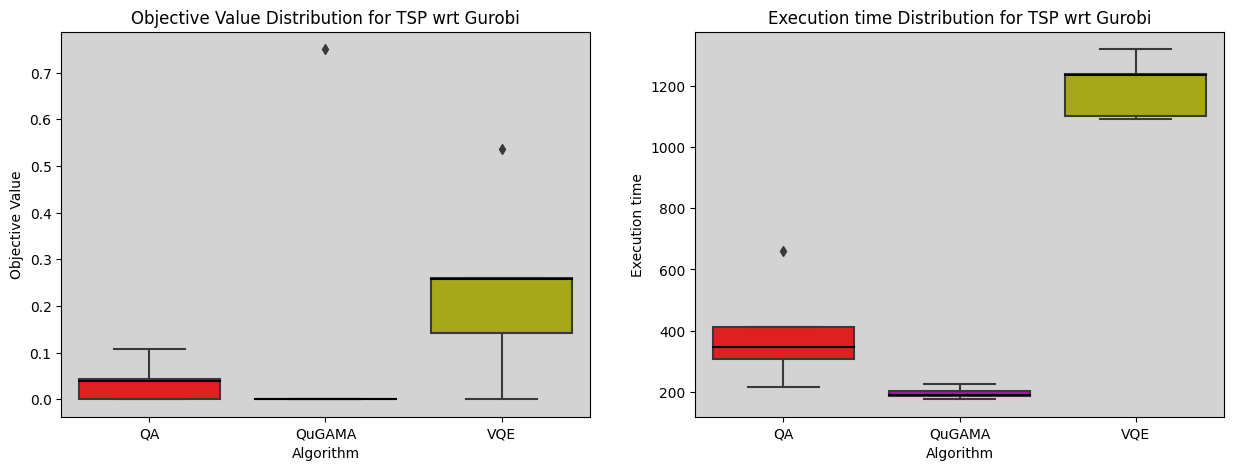

In [15]:
plot_boxplots_TSP()

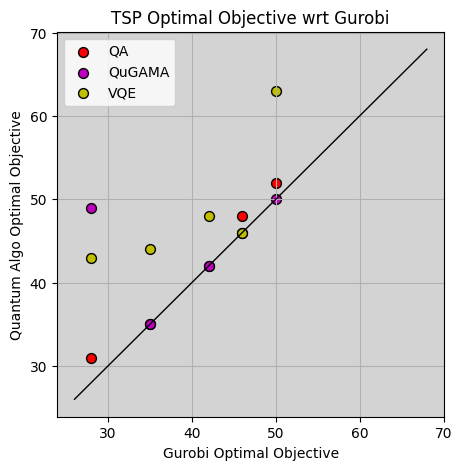

In [16]:
plot_optimal_objective_TSP(df_TSP)

## Graver elements analysis

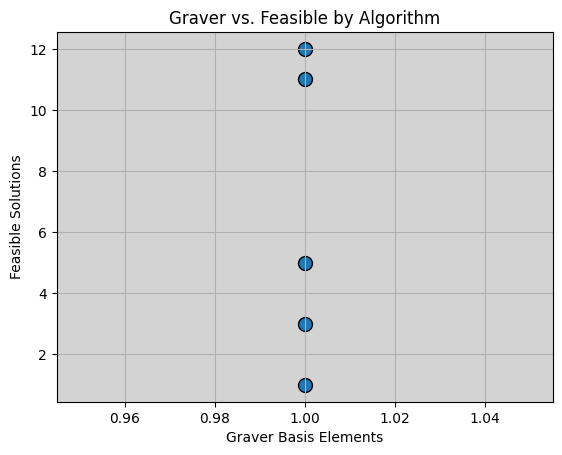

In [17]:
ax = plt.axes()

# plot scatterplot
ax.scatter(df_TSP['QuGAMA_Max_Num_Graver_Basis_TSP_MKP'], df_TSP['QuGAMA_Max_Num_Feasible_Sols_TSP_MKP'],
           s=100, edgecolor='k')

# set title and axes'names
ax.set_xlabel('Graver Basis Elements')
ax.set_ylabel('Feasible Solutions')
ax.set_title('Graver vs. Feasible by Algorithm')

# Set the background color to light gray
ax.set_facecolor('lightgray')
# Add grid lines
ax.grid(True)

# show plot
plt.show()

# CVRP (5, 2)

## Load dataframe

In [18]:
mask = df['Num_Vehicles']==2
df = df[mask]
df

,Quantum_Annealer,Quantum_Circuit_Model,Random_Seed,Num_Nodes,Num_Vehicles,Capacity,Customers_Demands,Graph_Sparsity,Average_Degree,Fully_Connected,...,QAOA_Classical_Optimizer_TSP_louvain,QAOA_Classical_Optimizer_TSP_Num_Iter_louvain,QAOA_Circuit_Depth_TSP_louvain,QAOA_Execution_Time_TSP_louvain,QuGAMA_Execution_Time_TSP_louvain,QuGAMA_Optimal_Objective_TSP_louvain,QuGAMA_Min_Num_Graver_Basis_TSP_louvain,QuGAMA_Max_Num_Graver_Basis_TSP_louvain,QuGAMA_Min_Num_Feasible_Sols_TSP_louvain,QuGAMA_Max_Num_Feasible_Sols_TSP_louvain
9,Advantage_system6.2,aer_simulator_statevector,16188,5,2,5,[0. 1. 1. 1. 1.],0.0,8.24,True,...,COBYLA,300.0,1.0,2.890673,4.342178,65.0,1.0,1.0,2.0,2.0
10,Advantage_system6.2,aer_simulator_statevector,43092,5,2,3,[0. 1. 1. 1. 1.],0.0,7.92,True,...,COBYLA,300.0,1.0,17.034086,14.945445,47.0,1.0,1.0,1.0,2.0
11,Advantage_system6.2,aer_simulator_statevector,6944,5,2,3,[0. 1. 1. 1. 1.],0.0,8.96,True,...,COBYLA,300.0,1.0,21.036453,9.873336,59.0,1.0,9.0,1.0,12.0
12,Advantage_system6.2,aer_simulator_statevector,16716,5,2,5,[0. 1. 1. 1. 1.],0.0,9.36,True,...,COBYLA,300.0,1.0,13.381059,8.054927,58.0,1.0,9.0,1.0,12.0
21,Advantage_system6.2,aer_simulator_statevector,34278,5,2,5,[0. 1. 1. 1. 1.],0.0,7.68,True,...,COBYLA,300.0,1.0,2.028950,6.250683,51.0,1.0,1.0,2.0,2.0
22,Advantage_system6.2,aer_simulator_statevector,4851,5,2,3,[0. 1. 1. 1. 1.],0.0,6.96,True,...,COBYLA,300.0,1.0,12.119739,14.143970,33.0,1.0,17.0,1.0,7.0
23,Advantage_system6.2,aer_simulator_statevector,9312,5,2,3,[0. 1. 1. 1. 1.],0.0,9.12,True,...,COBYLA,300.0,1.0,2.911551,2.422284,61.0,1.0,1.0,2.0,2.0
24,Advantage_system6.2,aer_simulator_statevector,8560,5,2,3,[0. 1. 1. 1. 1.],0.0,8.72,True,...,COBYLA,300.0,1.0,2.072721,3.050128,61.0,1.0,1.0,2.0,2.0
25,Advantage_system6.2,aer_simulator_statevector,3249,5,2,2,[0. 1. 1. 1. 1.],0.0,7.92,True,...,COBYLA,300.0,1.0,2.994236,3.504987,63.0,1.0,1.0,2.0,2.0
26,Advantage_system6.2,aer_simulator_statevector,3249,5,2,2,[0. 1. 1. 1. 1.],0.0,7.92,True,...,COBYLA,300.0,1.0,2.994236,3.504987,63.0,1.0,1.0,2.0,2.0


## Comparisons among the several algos and 2PE phases

In [19]:
def plot_boxplots(df, model_str):

  model_str_plot = capfirst(model_str)

  data_obj = {}
  data_time = {}

  for i, algo in enumerate(['QA', 'QuGAMA', 'VQE', 'QAOA']):

    # take Gurobi obj function value column
    df_obj_gurobi = df['Gurobi_Optimal_Objective_'+model_str]
    # take obj function value column
    df_obj = df[algo+'_Optimal_Objective_'+model_str]

    if model_str.split('_')[-1]!='louvain':
      # get rows associated to not valid clusterings
      rows_to_drop = df[df[algo+'_Optimal_Solution_'+ model_str.split('_')[-1] +'_is_valid_clustering']==False].index
      # drop rows associated to not valid clusterings
      df_obj = df_obj.drop(rows_to_drop)
      df_obj_gurobi = df_obj_gurobi.drop(rows_to_drop)

    # we want to examine the difference wrt the optimal objective as found by Gurobi
    df_obj = (df_obj.sub(df_obj_gurobi, axis=0)).div(df_obj_gurobi, axis=0)

    # save pandas series
    data_obj[algo] = list(df_obj)

    ##########################################################

    # take Gurobi execution time column
    df_time_gurobi = df['Gurobi_Execution_Time_'+model_str]
    # take execution time column
    df_time = df[algo+'_Execution_Time_'+model_str]

    if model_str.split('_')[-1]!='louvain':
      # get rows associated to not valid clusterings
      rows_to_drop = df[df[algo+'_Optimal_Solution_'+ model_str.split('_')[-1] +'_is_valid_clustering']==False].index
      # drop rows associated to not valid clusterings
      df_time = df_time.drop(rows_to_drop)
      df_time_gurobi = df_time_gurobi.drop(rows_to_drop)

    # we want to examine the quotient wrt Gurobi execution time
    df_time = df_time.div(df_time_gurobi, axis=0)

    # save pandas series
    data_time[algo] = list(df_time)


  ##########################################################

  # Create a subplot with two columns
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))

  my_pal = {0 : 'r', 1 : 'm', 2 : 'y', 3 : 'g'}

  # Box plot of objective function values by algorithm
  sns.boxplot(data=[data_obj['QA'], data_obj['QuGAMA'], data_obj['VQE'], data_obj['QAOA']],
              ax=axs[0], palette=my_pal, medianprops=dict(color="k", alpha=1))
  axs[0].set_xlabel('Algorithm')
  axs[0].set_ylabel('Objective Value')
  axs[0].set_title('Objective Value Distribution for ' + model_str_plot + ' wrt Gurobi')
  axs[0].set_xticks([0,1,2,3], ['QA', 'QuGAMA', 'VQE', 'QAOA'])
  axs[0].set_facecolor('lightgray')

  # Box plot of execution time values by algorithm
  sns.boxplot(data=[data_time['QA'], data_time['QuGAMA'], data_time['VQE'], data_time['QAOA']],
              ax=axs[1], palette=my_pal, medianprops=dict(color="k", alpha=1))
  axs[1].set_xlabel('Algorithm')
  axs[1].set_ylabel('Execution time')
  axs[1].set_title('Execution time Distribution for ' + model_str_plot + ' wrt Gurobi')
  axs[1].set_xticks([0,1,2,3], ['QA', 'QuGAMA', 'VQE', 'QAOA'])
  axs[1].set_facecolor('lightgray')

  plt.show()
  return

In [20]:
# number of graver elements extracted (both kernel and feasibles) for each approach
def plot_optimal_objective(df, model_str):

  colors = ['r', 'm', 'y', 'g']  # Assign colors to each algorithm
  marker_size = 40  # Set the marker size

  max_obj = -np.inf
  min_obj = np.inf

  fig, ax = plt.subplots(figsize = (5, 5))
  for i, algo in enumerate(['QA', 'QuGAMA', 'VQE', 'QAOA']):

    x_data = df['Gurobi_Optimal_Objective_' + model_str]
    y_data = df[algo + '_Optimal_Objective_' + model_str]

    if model_str.split('_')[-1]!='louvain':
      # get rows associated to not valid clusterings
      rows_to_drop = df[df[algo+'_Optimal_Solution_'+ model_str.split('_')[-1] +'_is_valid_clustering']==False].index
      # drop rows associated to not valid clusterings
      x_data = x_data.drop(rows_to_drop)
      y_data = y_data.drop(rows_to_drop)

    ax.scatter(x_data, y_data, label=algo, c=colors[i], s=marker_size, edgecolor='k', alpha=0.7)

    # take min obj to better plot identity function
    new_min_obj = np.min(y_data)
    if new_min_obj < min_obj:
      min_obj = new_min_obj

    # take max obj to better plot identity function
    new_max_obj = np.max(y_data)
    if new_max_obj > max_obj:
      max_obj = new_max_obj

  # plot also identity function for comparison
  ax.plot([min_obj-5, max_obj+5], [min_obj-5, max_obj+5], color='k', linewidth=1.0)

  # Set the background color to light gray
  ax.set_facecolor('lightgray')
  # Add grid lines
  ax.grid(True)
  # Set labels and title
  ax.set_xlabel('Gurobi Optimal Objective')
  ax.set_ylabel('Quantum Algo Optimal Objective')
  ax.set_title(capfirst(model_str) + ' Optimal Objective wrt Gurobi')

  # Add a legend
  ax.legend()

  # Show the plot
  plt.show()
  return

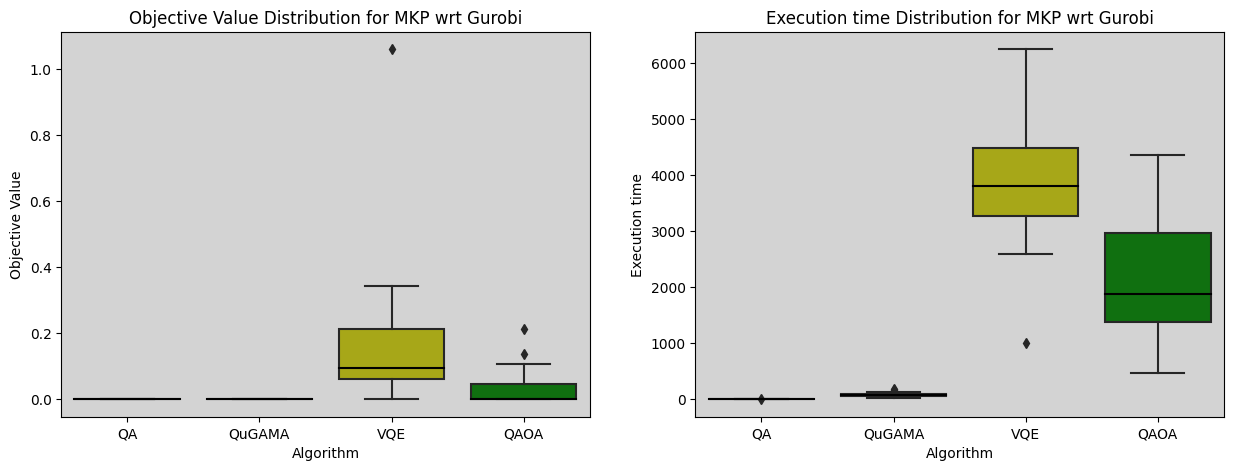

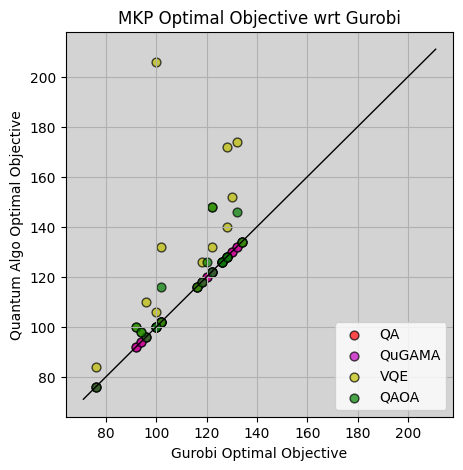

In [21]:
# Multi Knpasack Problem analysis
plot_boxplots(df, 'MKP')
plot_optimal_objective(df, 'MKP')

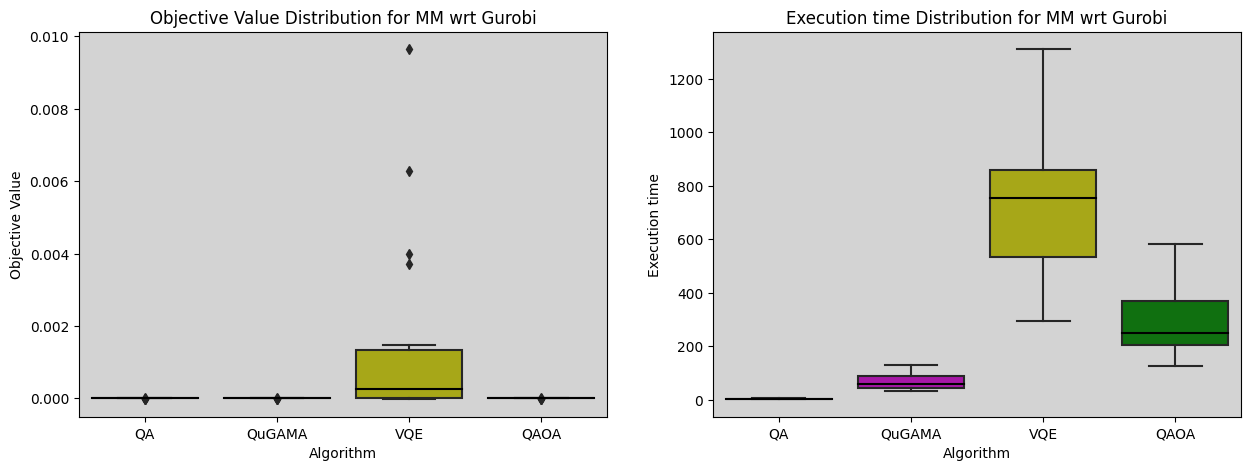

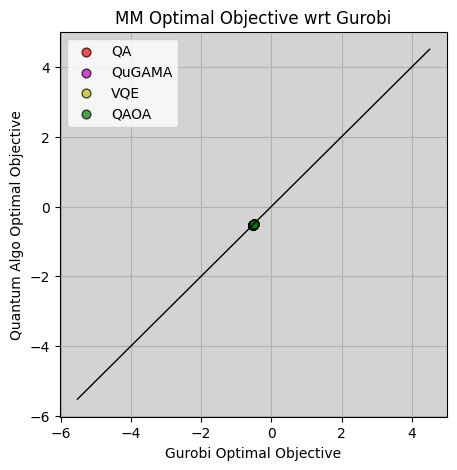

In [22]:
# Modularity Maximization analysis
plot_boxplots(df, 'MM')
plot_optimal_objective(df, 'MM')

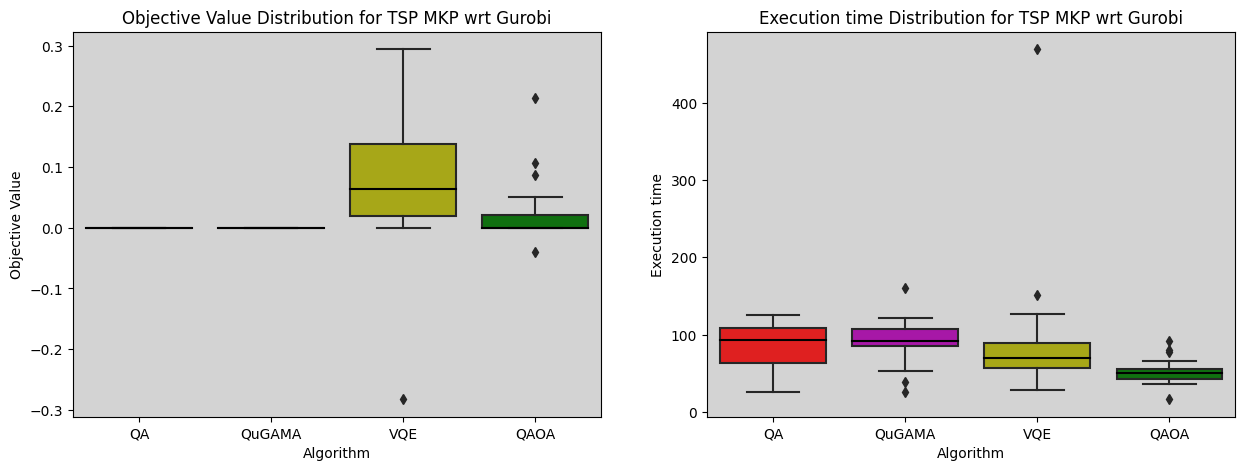

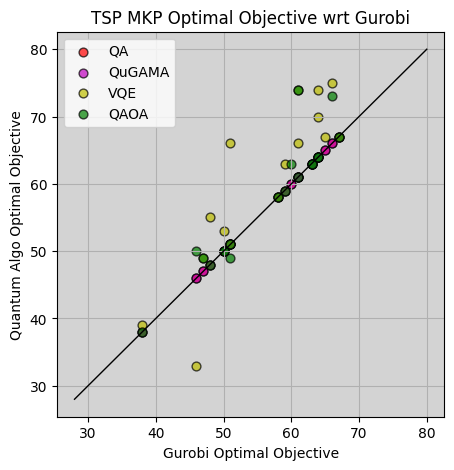

In [23]:
# Analysis of routing on MKP clusters
plot_boxplots(df, 'TSP_MKP')
plot_optimal_objective(df, 'TSP_MKP')

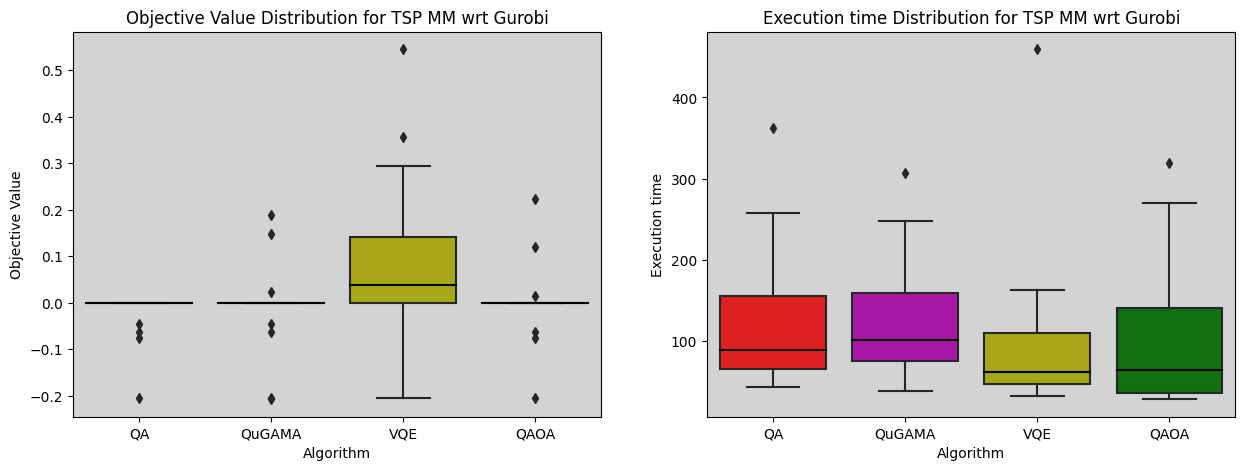

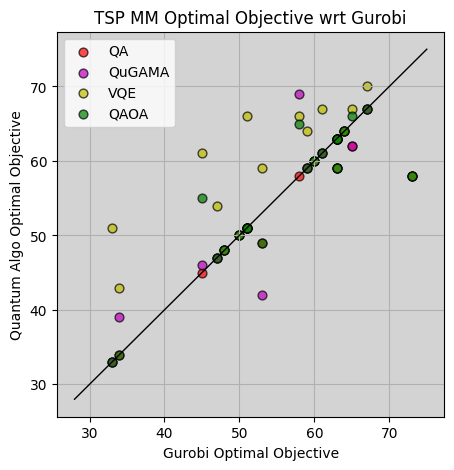

In [24]:
# Analysis of routing on MM clusters
plot_boxplots(df, 'TSP_MM')
plot_optimal_objective(df, 'TSP_MM')

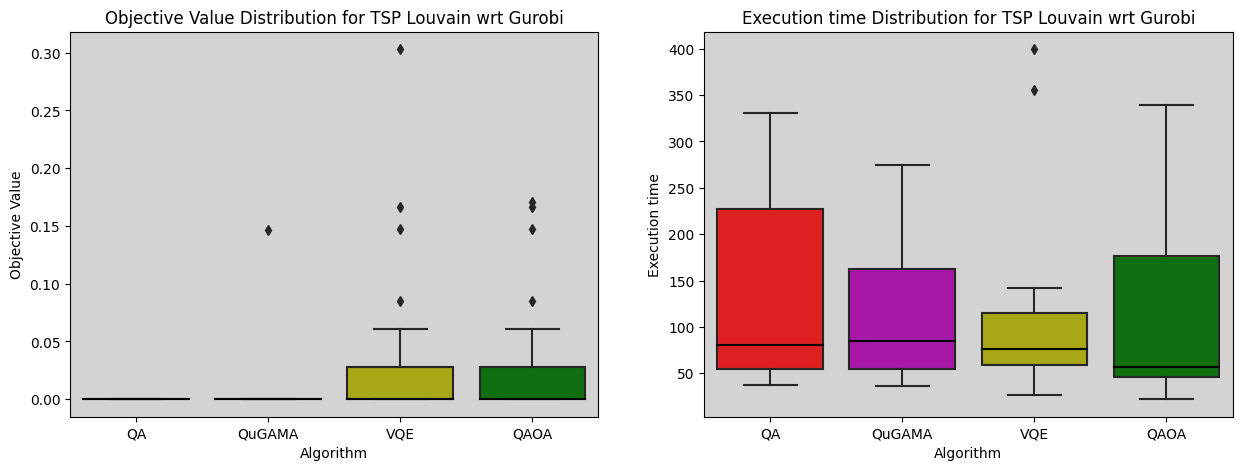

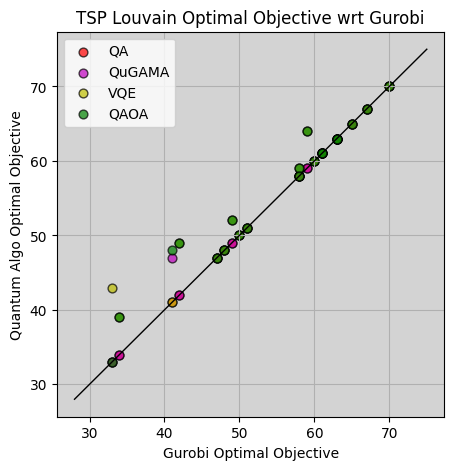

In [25]:
# Analysis of routing on Louvain clusters
plot_boxplots(df, 'TSP_louvain')
plot_optimal_objective(df, 'TSP_louvain')

## Final comparison: Full Formulation vs 2PE (clustering + routing)

In [26]:
def plot_final_boxplots(df, model_str):

  data_obj = {}
  data_time = {}

  for i, algo in enumerate(['Gurobi', 'QA', 'QuGAMA', 'VQE', 'QAOA']):

    # take Gurobi obj function value column
    df_obj_gurobi = df['Gurobi_Optimal_Objective_Full_Form']
    # take obj function value column
    df_obj = df[algo+'_Optimal_Objective_TSP_'+model_str]

    if model_str.split('_')[-1]!='louvain':
      # get rows associated to not valid clusterings
      rows_to_drop = df[df[algo+'_Optimal_Solution_'+ model_str.split('_')[-1] +'_is_valid_clustering']==False].index
      # drop rows associated to not valid clusterings
      df_obj = df_obj.drop(rows_to_drop)
      df_obj_gurobi = df_obj_gurobi.drop(rows_to_drop)

    # we want to examine the difference wrt the optimal objective as found by Gurobi (Full Formulation)
    df_obj = (df_obj.sub(df_obj_gurobi, axis=0)).div(df_obj_gurobi, axis=0)

    # save pandas series
    data_obj[algo] = list(df_obj)

    ##########################################################

    # take Gurobi execution time column
    df_time_gurobi = df['Gurobi_Execution_Time_Full_Form']
    # take execution time column related to TSP phase
    df_time = df[algo+'_Execution_Time_TSP_'+model_str]
    # add execution time column related to Clustering phase
    if model_str=='louvain':
      df_time = df_time.add(df['Louvain_Execution_Time'], axis=0)
    else:
      df_time = df_time.add(df[algo+'_Execution_Time_'+model_str], axis=0)

    if model_str.split('_')[-1]!='louvain':
      # get rows associated to not valid clusterings
      rows_to_drop = df[df[algo+'_Optimal_Solution_'+ model_str.split('_')[-1] +'_is_valid_clustering']==False].index
      # drop rows associated to not valid clusterings
      df_time = df_time.drop(rows_to_drop)
      df_time_gurobi = df_time_gurobi.drop(rows_to_drop)

    # we want to examine the quotient wrt Gurobi execution time
    df_time = df_time.div(df_time_gurobi, axis=0)

    # save pandas series
    data_time[algo] = list(df_time)


  ##########################################################


  # Create a subplot with two columns
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))

  my_pal = {0 : 'b', 1 : 'r', 2 : 'm', 3 : 'y', 4 : 'g'}

  # Box plot of objective function values by algorithm
  sns.boxplot(data=[data_obj['Gurobi'], data_obj['QA'], data_obj['QuGAMA'], data_obj['VQE'], data_obj['QAOA']],
              ax=axs[0], palette=my_pal, medianprops=dict(color="k", alpha=1))
  axs[0].set_xlabel('Algorithm')
  axs[0].set_ylabel('Objective Value')
  axs[0].set_title('2PH ('+capfirst(model_str)+'+TSP): Objective Value Distribution wrt Gurobi (Full Form)')
  axs[0].set_xticks([0,1,2,3,4], ['Gurobi', 'QA', 'QuGAMA', 'VQE', 'QAOA'])
  axs[0].set_facecolor('lightgray')

  # Box plot of execution time values by algorithm
  sns.boxplot(data=[data_obj['Gurobi'], data_time['QA'], data_time['QuGAMA'], data_time['VQE'], data_time['QAOA']],
              ax=axs[1], palette=my_pal, medianprops=dict(color="k", alpha=1))
  axs[1].set_xlabel('Algorithm')
  axs[1].set_ylabel('Execution time')
  axs[1].set_title('2PH ('+capfirst(model_str)+'+TSP): Objective Value Distribution wrt Gurobi (Full Form)')
  axs[1].set_xticks([0,1,2,3,4], ['Gurobi', 'QA', 'QuGAMA', 'VQE', 'QAOA'])
  axs[1].set_facecolor('lightgray')

  plt.show()
  return

In [27]:
# number of graver elements extracted (both kernel and feasibles) for each approach
def plot_final_optimal_objective(df, model_str):

  colors = ['b', 'r', 'm', 'y', 'g']  # Assign colors to each algorithm
  marker_size = 40  # Set the marker size

  max_obj = -np.inf
  min_obj = np.inf

  fig, ax = plt.subplots(figsize = (5, 5))
  for i, algo in enumerate(['Gurobi', 'QA', 'QuGAMA', 'VQE', 'QAOA']):

    x_data = df['Gurobi_Optimal_Objective_Full_Form']
    y_data = df[algo + '_Optimal_Objective_TSP_' + model_str]

    if model_str.split('_')[-1]!='louvain':
      # get rows associated to not valid clusterings
      rows_to_drop = df[df[algo+'_Optimal_Solution_'+ model_str.split('_')[-1] +'_is_valid_clustering']==False].index
      # drop rows associated to not valid clusterings
      x_data = x_data.drop(rows_to_drop)
      y_data = y_data.drop(rows_to_drop)

    ax.scatter(x_data, y_data, label=algo, c=colors[i], s=marker_size, edgecolor='k', alpha=0.7)

    # take min obj to better plot identity function
    new_min_obj = np.min(y_data)
    if new_min_obj < min_obj:
      min_obj = new_min_obj

    # take max obj to better plot identity function
    new_max_obj = np.max(y_data)
    if new_max_obj > max_obj:
      max_obj = new_max_obj

  # plot also identity function for comparison
  ax.plot([min_obj-5, max_obj+5], [min_obj-5, max_obj+5], color='k', linewidth=1.0)

  # Set the background color to light gray
  ax.set_facecolor('lightgray')
  # Add grid lines
  ax.grid(True)
  # Set labels and title
  ax.set_xlabel('Gurobi Optimal Objective Full Form')
  ax.set_ylabel('Quantum Algo Optimal Objective')
  ax.set_title(capfirst(model_str) + '+TSP Optimal Objective wrt Gurobi Full Formulation')

  # Add a legend
  ax.legend()

  # Show the plot
  plt.show()
  return

In [28]:
def plot_final_boxplots_for_comparison(df):

  data_obj = {}

  for algo in ['Gurobi', 'QA', 'QuGAMA', 'VQE', 'QAOA']:

    for i, clustering in enumerate(['MKP', 'MM', 'louvain']):

      # take Gurobi obj function value column
      df_obj_gurobi = df['Gurobi_Optimal_Objective_Full_Form']
      # take obj function value column
      df_obj = df[algo + '_Optimal_Objective_TSP_' + clustering]

      if clustering!='louvain':
        # get rows associated to not valid clusterings
        rows_to_drop = df[df[algo + '_Optimal_Solution_'+ clustering +'_is_valid_clustering']==False].index
        # drop rows associated to not valid clusterings
        df_obj = df_obj.drop(rows_to_drop)
        df_obj_gurobi = df_obj_gurobi.drop(rows_to_drop)

      # we want to examine the difference wrt the optimal objective as found by Gurobi (Full Formulation)
      df_obj = (df_obj.sub(df_obj_gurobi, axis=0)).div(df_obj_gurobi, axis=0)

      # save pandas series
      data_obj[(algo, clustering)] = list(df_obj)

  # Create a subplot with two columns
  fig, axs = plt.subplots(2, 3, figsize=(15, 10))

  my_col = ['b', 'r', 'm', 'y', 'g']

  # Box plot of objective function values by algorithm
  for i, algo in enumerate(['Gurobi', 'QA', 'QuGAMA', 'VQE', 'QAOA']):
    sns.boxplot(data=[data_obj[(algo, 'MKP')], data_obj[(algo, 'MM')], data_obj[(algo, 'louvain')]],
                ax=axs[int(i/3), i%3], color=my_col[i], medianprops=dict(color="k", alpha=1))
    axs[int(i/3), i%3].set_xlabel('Clustering Algorithm')
    axs[int(i/3), i%3].set_ylabel('Objective Value')
    axs[int(i/3), i%3].set_title('2PH via '+ capfirst(algo) +' wrt Gurobi (Full Form)')
    axs[int(i/3), i%3].set_xticks([0,1,2], ['MKP', 'MM', 'Louvain'])
    axs[int(i/3), i%3].set_facecolor('lightgray')

  fig.tight_layout()
  fig.delaxes(axs[1][2])
  plt.show()
  return

In [29]:
def plot_final_boxplots_for_comparison_exec_times(df):

  data_time = {}

  for algo in ['Gurobi', 'QA', 'QuGAMA', 'VQE', 'QAOA']:

    for i, clustering in enumerate(['MKP', 'MM', 'louvain']):

      # take Gurobi execution time column
      df_time_gurobi = df['Gurobi_Execution_Time_Full_Form']

      # take execution time column related to TSP phase
      df_time = df[algo+'_Execution_Time_TSP_'+clustering]
      # add execution time column related to Clustering phase
      if clustering=='louvain':
        df_time = df_time.add(df['Louvain_Execution_Time'], axis=0)
      else:
        df_time = df_time.add(df[algo+'_Execution_Time_'+clustering], axis=0)

      if clustering!='louvain':
        # get rows associated to not valid clusterings
        rows_to_drop = df[df[algo + '_Optimal_Solution_'+ clustering +'_is_valid_clustering']==False].index
        # drop rows associated to not valid clusterings
        df_time = df_time.drop(rows_to_drop)
        df_time_gurobi = df_time_gurobi.drop(rows_to_drop)

      # we want to examine the quotient wrt Gurobi execution time
      df_time = df_time.div(df_time_gurobi, axis=0)

      # save pandas series
      data_time[(algo, clustering)] = list(df_time)

  # Create a subplot with two columns
  fig, axs = plt.subplots(2, 3, figsize=(15, 10))

  my_col = ['b', 'r', 'm', 'y', 'g']

  # Box plot of execution times by algorithm
  for i, algo in enumerate(['Gurobi', 'QA', 'QuGAMA', 'VQE', 'QAOA']):
    sns.boxplot(data=[data_time[(algo, 'MKP')], data_time[(algo, 'MM')], data_time[(algo, 'louvain')]],
                ax=axs[int(i/3), i%3], color=my_col[i], medianprops=dict(color="k", alpha=1))
    axs[int(i/3), i%3].set_xlabel('Clustering Algorithm')
    axs[int(i/3), i%3].set_ylabel('Execution Time')
    axs[int(i/3), i%3].set_title('2PH via '+ capfirst(algo) +' wrt Gurobi (Full Form)')
    axs[int(i/3), i%3].set_xticks([0,1,2], ['MKP', 'MM', 'Louvain'])
    axs[int(i/3), i%3].set_facecolor('lightgray')

  fig.tight_layout()
  fig.delaxes(axs[1][2])
  plt.show()
  return

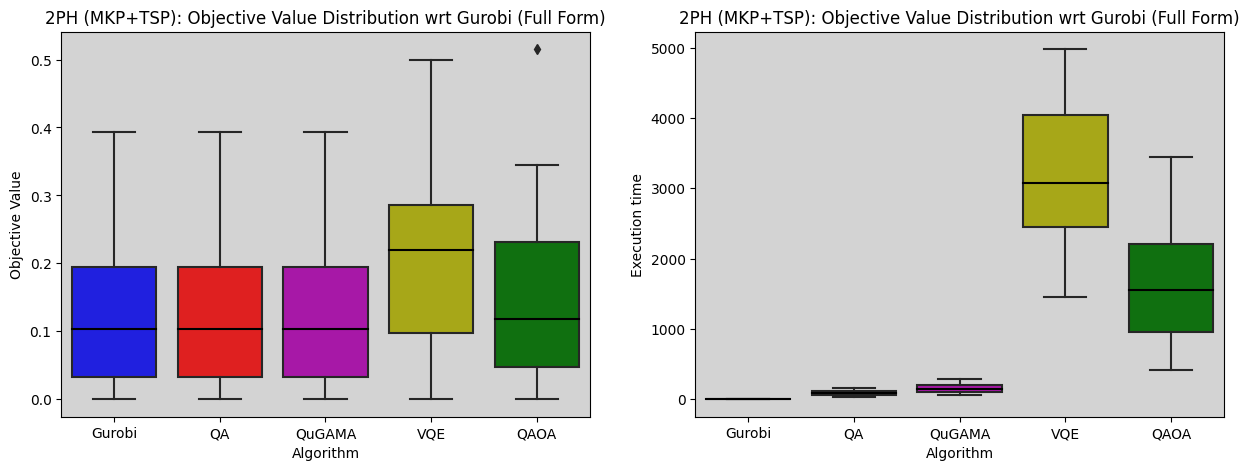

In [30]:
# Final comparison between Full Formulation and 2PE (clustering via MKP)
plot_final_boxplots(df, 'MKP')

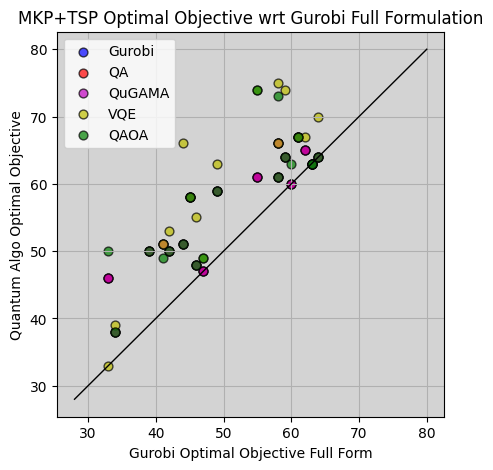

In [31]:
plot_final_optimal_objective(df, 'MKP')

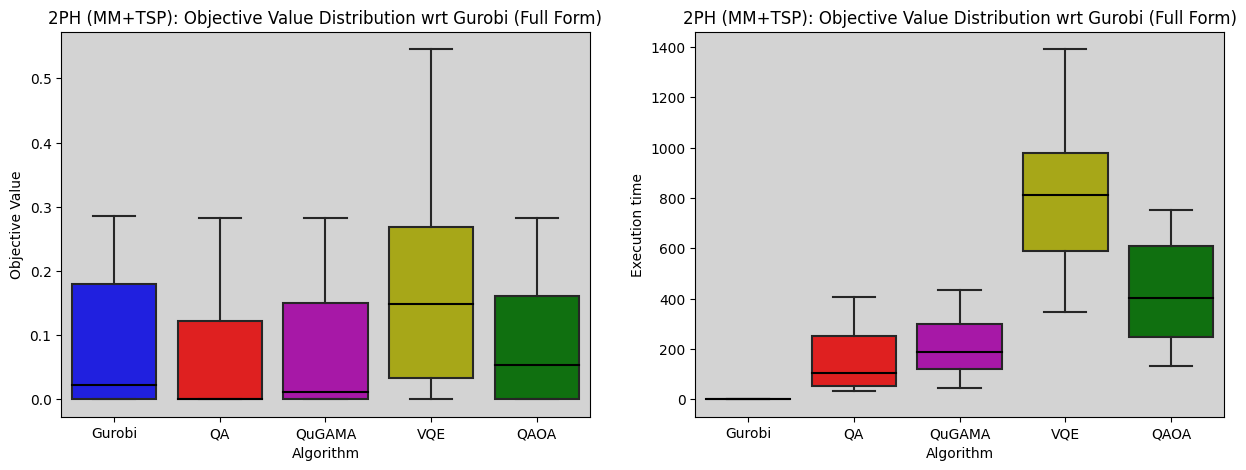

In [32]:
# Final comparison between Full Formulation and 2PE (clustering via MM)
plot_final_boxplots(df, 'MM')

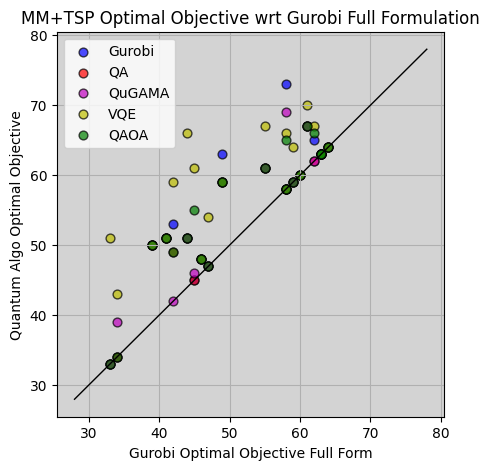

In [33]:
plot_final_optimal_objective(df, 'MM')

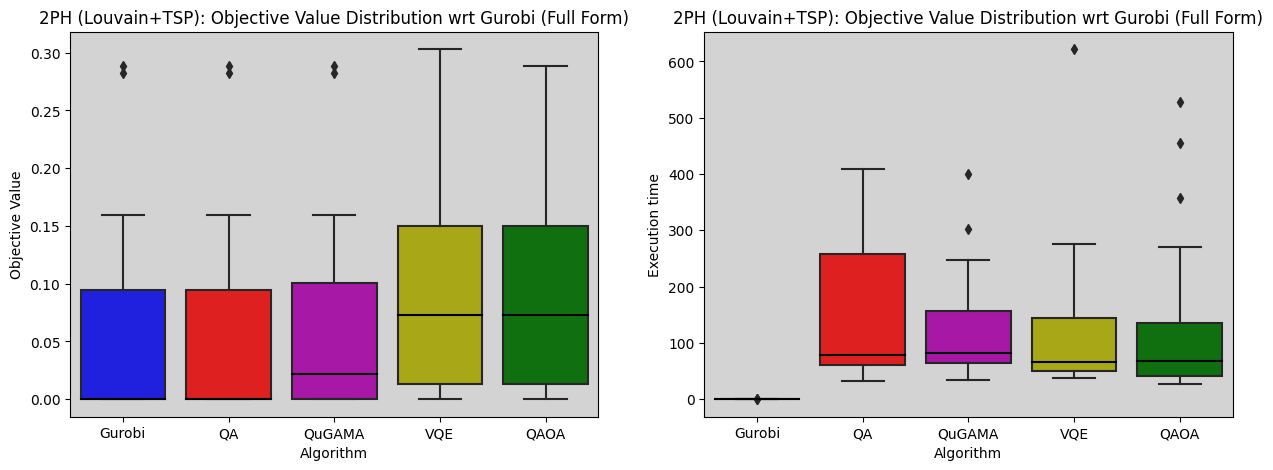

In [34]:
# Final comparison between Full Formulation and 2PE (clustering via louvain)
plot_final_boxplots(df, 'louvain')

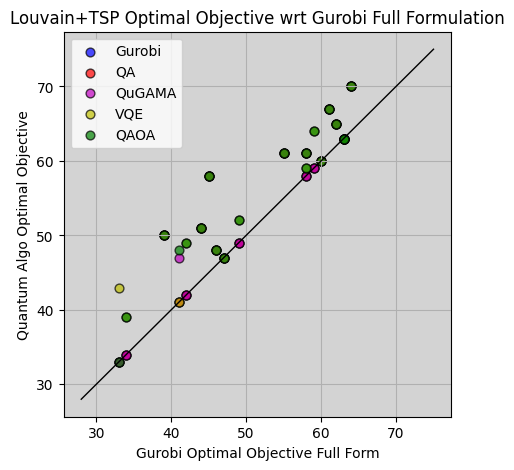

In [35]:
plot_final_optimal_objective(df, 'louvain')

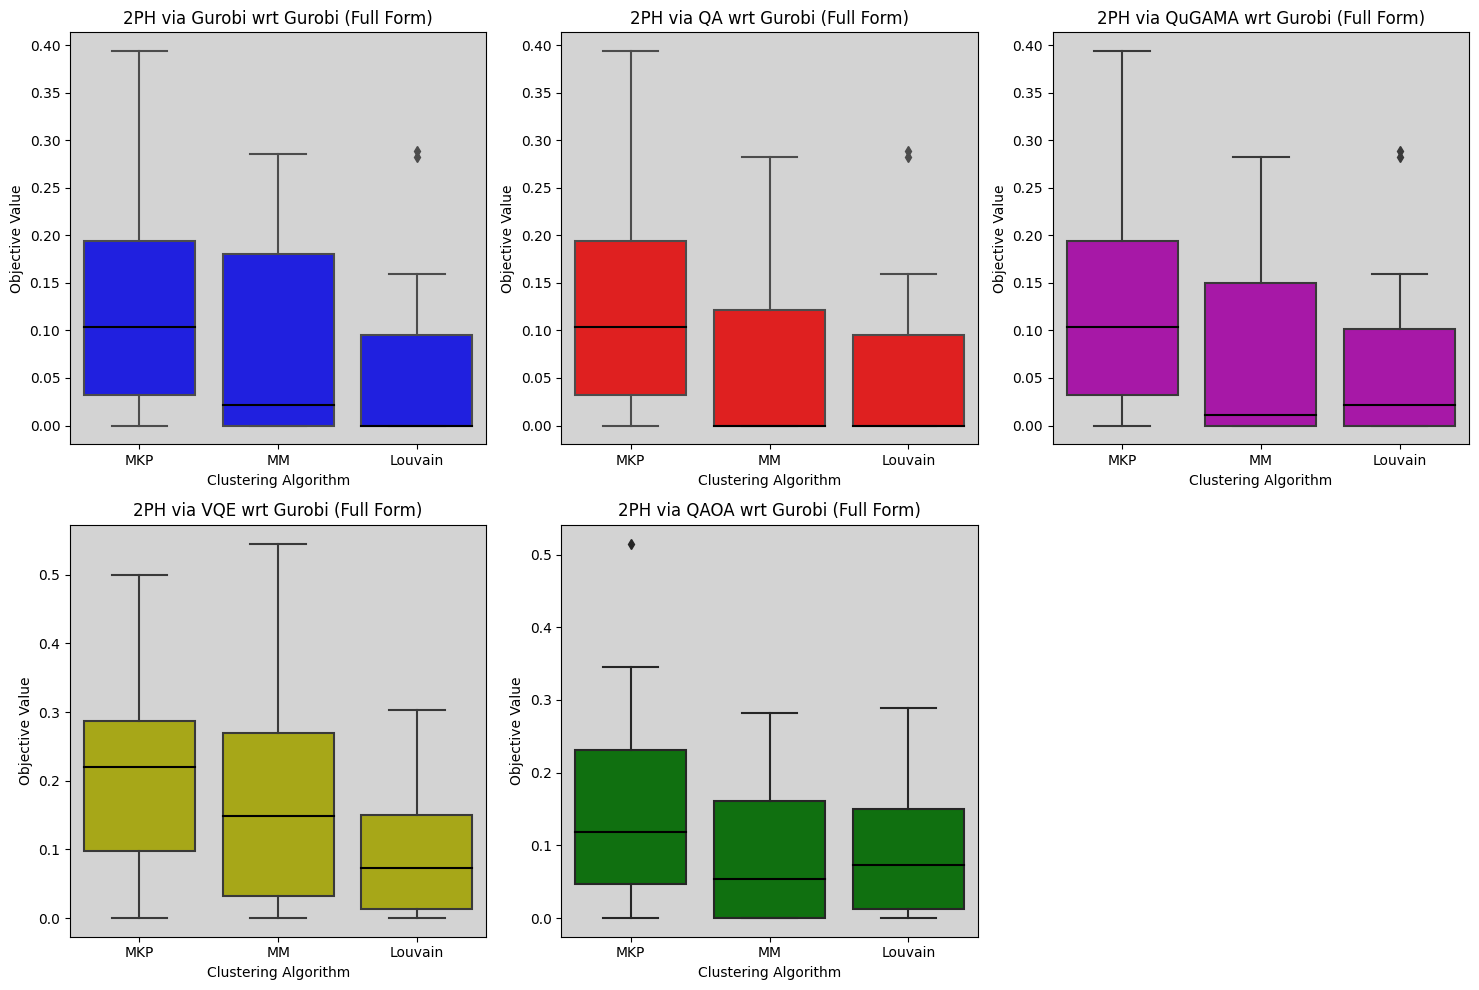

In [36]:
plot_final_boxplots_for_comparison(df)

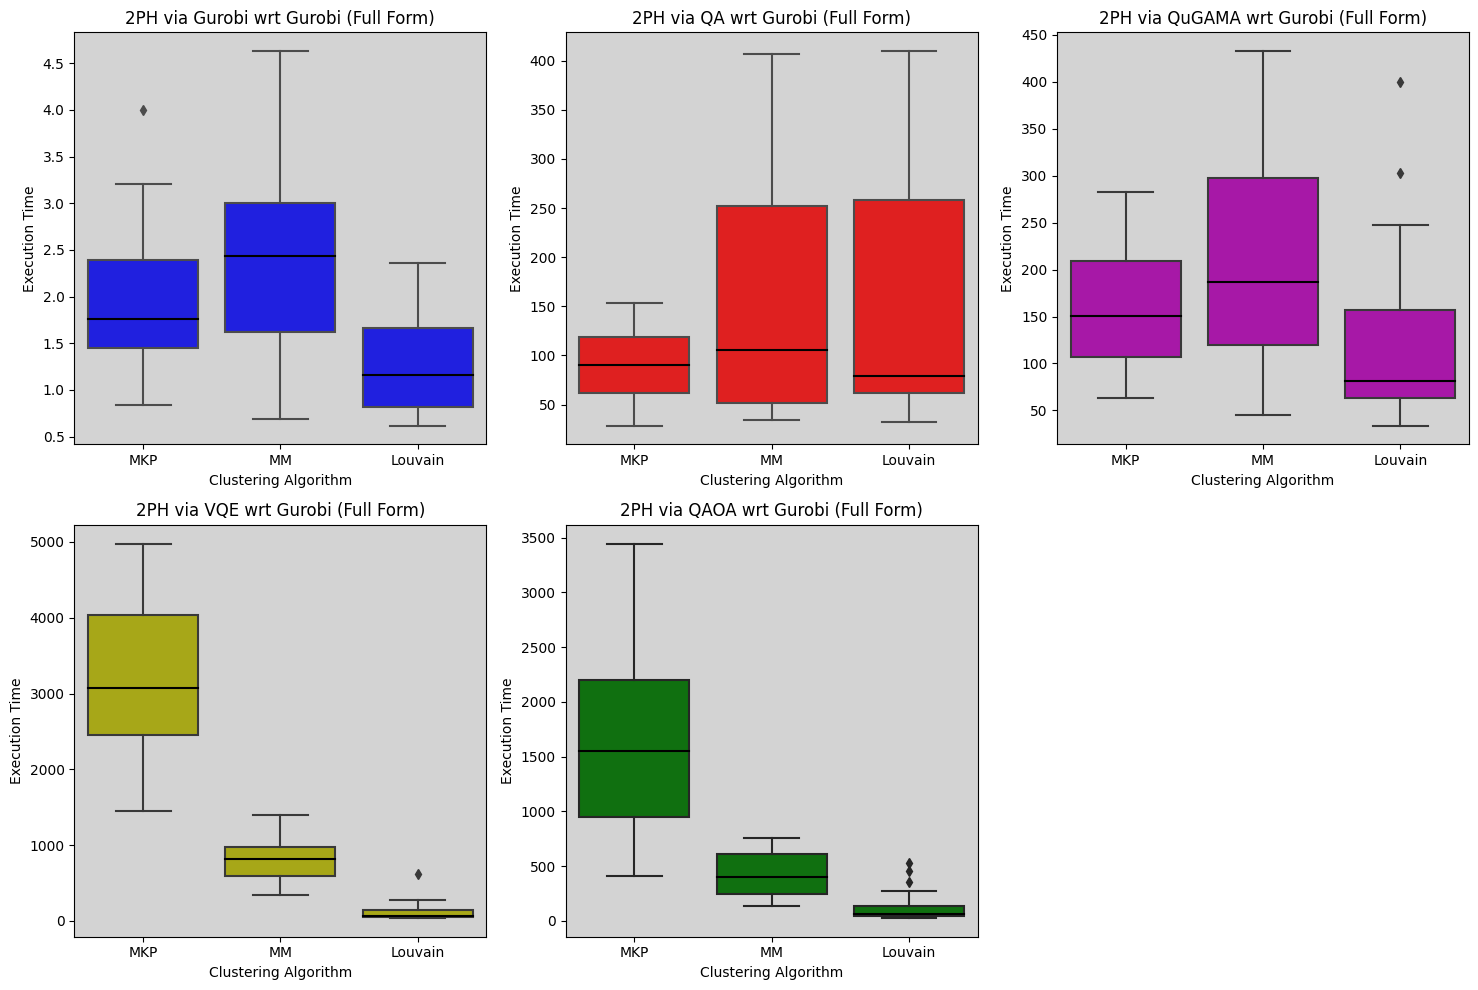

In [37]:
plot_final_boxplots_for_comparison_exec_times(df)

## Graver elements analysis

In [38]:
# number of graver elements extracted (both kernel and feasibles) for each approach
def plot_graver_extraction(df):

  mask_1 = df['Quantum_Annealer'] != 'SimulAnneal'
  mask_2 = df['Num_Vehicles'] == 2
  df = df[np.logical_and(mask_1, mask_2)]

  cols_graver_elems = ['QuGAMA_Num_Graver_Basis_'+model_str for model_str in ['MKP', 'MM']] + ['QuGAMA_Max_Num_Graver_Basis_TSP_'+model_str for model_str in ['MKP', 'MM', 'louvain']]
  cols_graver_feas = ['QuGAMA_Num_Feasible_Sols_'+model_str for model_str in ['MKP', 'MM']] + ['QuGAMA_Max_Num_Feasible_Sols_TSP_'+model_str for model_str in ['MKP', 'MM', 'louvain']]

  df1 = df[cols_graver_elems]
  df2 = df[cols_graver_feas]

  colors = ['b', 'g', 'r', 'c', 'm']  # Assign colors to each algorithm
  marker_size = 100  # Set the marker size

  fig, ax = plt.subplots(figsize = (5, 5))
  for i, algo in enumerate(['MKP', 'MM', 'TSP_MKP', 'TSP_MM', 'TSP_louvain']):
    ax.scatter(df1.iloc[:, i], df2.iloc[:, i], label=algo, c=colors[i], s=marker_size, edgecolor='k')

  # Set logarithmic scale on the x variable
  # ax.set_xscale("log")
  # ax.set_yscale("log")

  # Set the background color to light gray
  ax.set_facecolor('lightgray')
  # Add grid lines
  ax.grid(True)
  # Set labels and title
  ax.set_xlabel('Graver Basis Elements')
  ax.set_ylabel('Feasible Solutions')
  ax.set_title('Graver vs. Feasible by Algorithm')

  # Add a legend
  ax.legend()

  # Show the plot
  plt.show()
  return

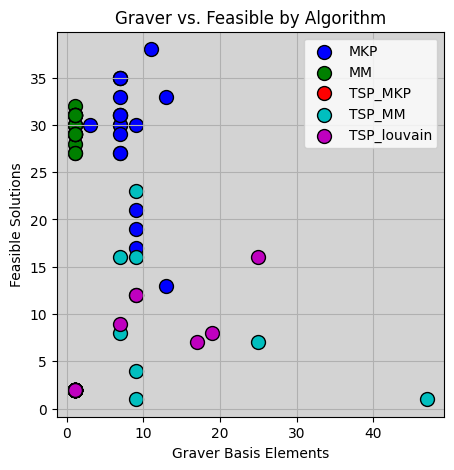

In [39]:
plot_graver_extraction(df)